In [1]:
import pandas as pd #Library untuk dataframe
import matplotlib.pyplot as plt #Library untuk data visualisasi
import seaborn as sns #Library untuk data visualisasi
import numpy as np #Library untuk matematika
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import datetime 
from datetime import date, timedelta

In [2]:
# Membaca file csv
df = pd.read_csv ('warmindo_dataset.csv')
df

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,4/11/22,44,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,QRIS-OVO,Dine-In,18000
1,2,2,8/1/22,10,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,CASH,Delivery,18000
2,3,3,4/3/22,62,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,QRIS-OTHERS,Delivery,10000
3,4,4,3/19/22,48,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,CASH,Dine-In,30000
4,5,5,4/29/22,87,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-OVO,Dine-In,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,495,5/17/22,11,Indomie Baso Sapi,mie-kuah,makanan,1,9000,CASH,Delivery,9000
495,496,496,6/6/22,55,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,QRIS-GOPAY,Delivery,9000
496,497,497,7/14/22,25,Indomie Goreng Rendang,mie-goreng,makanan,2,9000,QRIS-GOPAY,Delivery,18000
497,498,498,8/22/22,39,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,QRIS-DANA,Delivery,18000


In [3]:
#membersihkan data yang tidak penting dengan menghapus

df.drop(["invoice_id", "customer_id"], axis=1, inplace=True)
print(df)

      id tanggal_transaksi               nama_produk jenis_produk  \
0      1           4/11/22      Indomie Ayam Spesial     mie-kuah   
1      2            8/1/22      Indomie Ayam Spesial     mie-kuah   
2      3            4/3/22  Indomie Rasa Soto Betawi     mie-kuah   
3      4           3/19/22  Indomie Rasa Soto Padang     mie-kuah   
4      5           4/29/22   Indomie Rasa Sop Buntut     mie-kuah   
..   ...               ...                       ...          ...   
494  495           5/17/22         Indomie Baso Sapi     mie-kuah   
495  496            6/6/22    Indomie Goreng Spesial   mie-goreng   
496  497           7/14/22    Indomie Goreng Rendang   mie-goreng   
497  498           8/22/22      Indomie Goreng Pedas   mie-goreng   
498  499           6/21/22          Indomie Soto Mie     mie-kuah   

    kategori_produk  quantity  harga_jual jenis_pembayaran jenis_pesanan  \
0           makanan         2        9000         QRIS-OVO       Dine-In   
1           makanan

In [4]:
df['tanggal_transaksi'] = pd.to_datetime(df['tanggal_transaksi'])

In [5]:
print(type(df.tanggal_transaksi[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [6]:
df.sort_values(by='tanggal_transaksi', ascending=True, inplace=True)
df

,id,tanggal_transaksi,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
445,446,2022-01-01,Indomie Baso Sapi,mie-kuah,makanan,2,9000,QRIS-GOPAY,Dine-In,18000
126,127,2022-01-02,Indomie Goreng Aceh,mie-goreng,makanan,2,9000,QRIS-GOPAY,Dine-In,18000
205,206,2022-01-02,Indomie Rasa Empal Gentong,mie-kuah,makanan,2,10000,QRIS-GOPAY,Dine-In,20000
238,239,2022-01-03,Indomie Ayam Spesial,mie-kuah,makanan,3,9000,QRIS-GOPAY,Delivery,27000
346,347,2022-01-03,Indomie Rasa Soto Lamongan,mie-kuah,makanan,1,10000,QRIS-OTHERS,Dine-In,10000
...,...,...,...,...,...,...,...,...,...,...
441,442,2022-08-27,Indomie Rasa Soto Betawi,mie-kuah,makanan,2,10000,QRIS-GOPAY,Dine-In,20000
461,462,2022-08-29,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-GOPAY,Dine-In,20000
394,395,2022-08-29,Indomie Rasa Soto Padang,mie-kuah,makanan,2,10000,QRIS-DANA,Dine-In,20000
276,277,2022-08-29,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,QRIS-DANA,Dine-In,9000


In [7]:
df['hari'] = df['tanggal_transaksi'].dt.strftime('%A')
df

,id,tanggal_transaksi,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan,hari
445,446,2022-01-01,Indomie Baso Sapi,mie-kuah,makanan,2,9000,QRIS-GOPAY,Dine-In,18000,Saturday
126,127,2022-01-02,Indomie Goreng Aceh,mie-goreng,makanan,2,9000,QRIS-GOPAY,Dine-In,18000,Sunday
205,206,2022-01-02,Indomie Rasa Empal Gentong,mie-kuah,makanan,2,10000,QRIS-GOPAY,Dine-In,20000,Sunday
238,239,2022-01-03,Indomie Ayam Spesial,mie-kuah,makanan,3,9000,QRIS-GOPAY,Delivery,27000,Monday
346,347,2022-01-03,Indomie Rasa Soto Lamongan,mie-kuah,makanan,1,10000,QRIS-OTHERS,Dine-In,10000,Monday
...,...,...,...,...,...,...,...,...,...,...,...
441,442,2022-08-27,Indomie Rasa Soto Betawi,mie-kuah,makanan,2,10000,QRIS-GOPAY,Dine-In,20000,Saturday
461,462,2022-08-29,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-GOPAY,Dine-In,20000,Monday
394,395,2022-08-29,Indomie Rasa Soto Padang,mie-kuah,makanan,2,10000,QRIS-DANA,Dine-In,20000,Monday
276,277,2022-08-29,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,QRIS-DANA,Dine-In,9000,Monday


In [8]:
penjumlahan_berdasarkan_tanggal = df.groupby('hari')['nilai_penjualan'].sum()
penjumlahan_berdasarkan_tanggal

type(penjumlahan_berdasarkan_tanggal)
penjumlahan_berdasarkan_tanggal.to_frame()

,nilai_penjualan
hari,
Friday,1232000
Monday,1536000
Saturday,1157000
Sunday,1263000
Thursday,990000
Tuesday,1664000
Wednesday,1360000


In [9]:
top_5_hari_terlaris = penjumlahan_berdasarkan_tanggal.nlargest(5)
top_5_hari_terlaris

hari
Tuesday      1664000
Monday       1536000
Wednesday    1360000
Sunday       1263000
Friday       1232000
Name: nilai_penjualan, dtype: int64

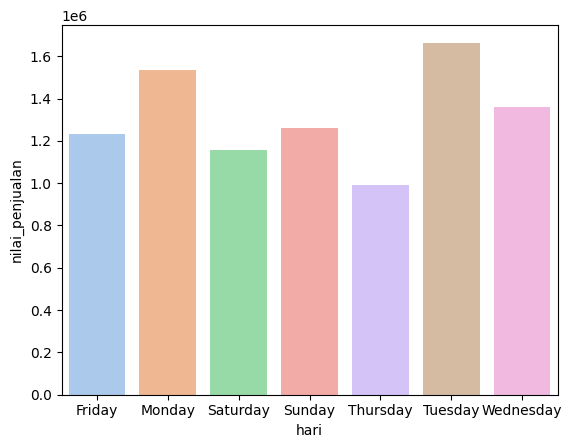

In [10]:
data_tanggal = df["hari"].value_counts().to_dict()

data_pie = data_tanggal.values()
label_pie = data_tanggal.keys()
colors = sns.color_palette('pastel')[:]

sns.barplot(data = penjumlahan_berdasarkan_tanggal.to_frame(), x = "hari", y = "nilai_penjualan", palette=colors)
plt.show()


In [11]:
penjumlahan_berdasarkan_jenisproduk = df.groupby('jenis_produk')['nilai_penjualan'].sum()
penjumlahan_berdasarkan_jenisproduk

type(penjumlahan_berdasarkan_jenisproduk)
penjumlahan_berdasarkan_jenisproduk.to_frame()

,nilai_penjualan
jenis_produk,
mie-goreng,2637000
mie-kuah,6565000


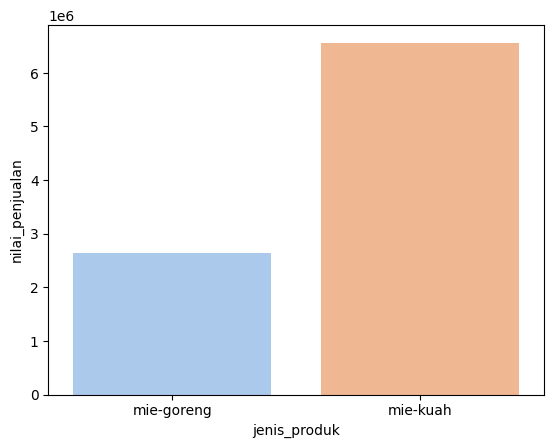

In [12]:
data_jenis_produk = df["jenis_produk"].value_counts().to_dict()

data_pie = data_jenis_produk.values()
label_pie = data_jenis_produk.keys()
colors = sns.color_palette('pastel')[:]

sns.barplot(data = penjumlahan_berdasarkan_jenisproduk.to_frame(), x = "jenis_produk", y = "nilai_penjualan", palette=colors)
plt.show()

In [13]:
df.sort_values(by='jenis_pesanan', ascending=True, inplace=True)
df


,id,tanggal_transaksi,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan,hari
429,430,2022-05-10,Indomie Goreng Aceh,mie-goreng,makanan,1,9000,QRIS-DANA,Delivery,9000,Tuesday
349,350,2022-05-27,Indomie Rasa Empal Gentong,mie-kuah,makanan,3,10000,QRIS-SHOPEEPAY,Delivery,30000,Friday
158,159,2022-05-27,Indomie Goreng Sambal Matah,mie-goreng,makanan,1,9000,QRIS-OTHERS,Delivery,9000,Friday
269,270,2022-05-26,Indomie Ayam Spesial,mie-kuah,makanan,1,9000,QRIS-OTHERS,Delivery,9000,Thursday
465,466,2022-05-21,Indomie Rasa Soto Banjar Limau Kuit,mie-kuah,makanan,1,10000,QRIS-SHOPEEPAY,Delivery,10000,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
153,154,2022-05-24,indomie Ayam Bawang,mie-kuah,makanan,1,9000,QRIS-DANA,Dine-In,9000,Tuesday
417,418,2022-05-24,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,QRIS-GOPAY,Dine-In,18000,Tuesday
451,452,2022-05-24,Indomie Goreng Pedas,mie-goreng,makanan,1,9000,QRIS-SHOPEEPAY,Dine-In,9000,Tuesday
278,279,2022-02-23,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,CASH,Dine-In,20000,Wednesday


In [14]:
df.iloc[:, 7]

429         QRIS-DANA
349    QRIS-SHOPEEPAY
158       QRIS-OTHERS
269       QRIS-OTHERS
465    QRIS-SHOPEEPAY
            ...      
153         QRIS-DANA
417        QRIS-GOPAY
451    QRIS-SHOPEEPAY
278              CASH
445        QRIS-GOPAY
Name: jenis_pembayaran, Length: 499, dtype: object

In [15]:
data_jenis_pesanan = df["jenis_pesanan"].value_counts()

data_jenis_pesanan.get('Delivery', 0)
data_jenis_pesanan.get('Dine-In', 0)

data_jenis_pesanan.to_frame()




,count
jenis_pesanan,
Dine-In,258
Delivery,241


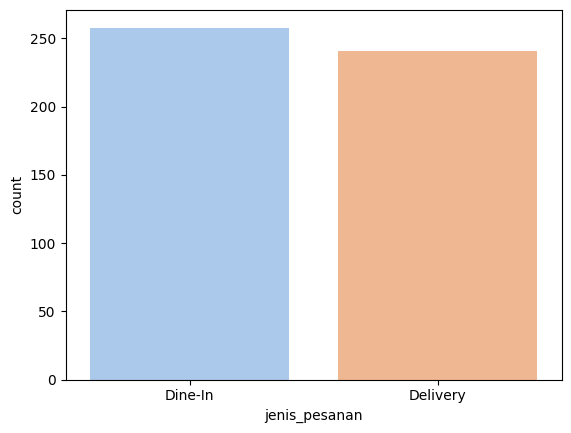

In [16]:
diagram_jenis_pesanan = df["jenis_pesanan"].value_counts().to_dict()

data_pie = diagram_jenis_pesanan.values()
label_pie = diagram_jenis_pesanan.keys()
colors = sns.color_palette('pastel')[:]

sns.barplot(data = data_jenis_pesanan.to_frame(), x = "jenis_pesanan", y = "count", palette=colors)
plt.show()

In [17]:
df2 = df.copy()
df2

,id,tanggal_transaksi,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan,hari
429,430,2022-05-10,Indomie Goreng Aceh,mie-goreng,makanan,1,9000,QRIS-DANA,Delivery,9000,Tuesday
349,350,2022-05-27,Indomie Rasa Empal Gentong,mie-kuah,makanan,3,10000,QRIS-SHOPEEPAY,Delivery,30000,Friday
158,159,2022-05-27,Indomie Goreng Sambal Matah,mie-goreng,makanan,1,9000,QRIS-OTHERS,Delivery,9000,Friday
269,270,2022-05-26,Indomie Ayam Spesial,mie-kuah,makanan,1,9000,QRIS-OTHERS,Delivery,9000,Thursday
465,466,2022-05-21,Indomie Rasa Soto Banjar Limau Kuit,mie-kuah,makanan,1,10000,QRIS-SHOPEEPAY,Delivery,10000,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
153,154,2022-05-24,indomie Ayam Bawang,mie-kuah,makanan,1,9000,QRIS-DANA,Dine-In,9000,Tuesday
417,418,2022-05-24,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,QRIS-GOPAY,Dine-In,18000,Tuesday
451,452,2022-05-24,Indomie Goreng Pedas,mie-goreng,makanan,1,9000,QRIS-SHOPEEPAY,Dine-In,9000,Tuesday
278,279,2022-02-23,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,CASH,Dine-In,20000,Wednesday


In [18]:
dataset_1 = df2.loc[:,['tanggal_transaksi', 'jenis_produk', 'nilai_penjualan']]
dataset_1


,tanggal_transaksi,jenis_produk,nilai_penjualan
429,2022-05-10,mie-goreng,9000
349,2022-05-27,mie-kuah,30000
158,2022-05-27,mie-goreng,9000
269,2022-05-26,mie-kuah,9000
465,2022-05-21,mie-kuah,10000
...,...,...,...
153,2022-05-24,mie-kuah,9000
417,2022-05-24,mie-goreng,18000
451,2022-05-24,mie-goreng,9000
278,2022-02-23,mie-kuah,20000


In [20]:
dataset_miegoreng = dataset_1[dataset_1['jenis_produk'].str.contains('mie-goreng')]
dataset_miegoreng

,tanggal_transaksi,jenis_produk,nilai_penjualan
429,2022-05-10,mie-goreng,9000
158,2022-05-27,mie-goreng,9000
380,2022-05-15,mie-goreng,9000
261,2022-05-14,mie-goreng,27000
366,2022-05-29,mie-goreng,9000
...,...,...,...
299,2022-05-31,mie-goreng,27000
382,2022-05-22,mie-goreng,18000
401,2022-05-27,mie-goreng,18000
417,2022-05-24,mie-goreng,18000


In [21]:
dataset_miekuah = dataset_1[dataset_1['jenis_produk'].str.contains('mie-kuah')]
dataset_miekuah

,tanggal_transaksi,jenis_produk,nilai_penjualan
349,2022-05-27,mie-kuah,30000
269,2022-05-26,mie-kuah,9000
465,2022-05-21,mie-kuah,10000
29,2022-05-18,mie-kuah,10000
142,2022-05-18,mie-kuah,18000
...,...,...,...
433,2022-05-24,mie-kuah,30000
186,2022-05-24,mie-kuah,10000
153,2022-05-24,mie-kuah,9000
278,2022-02-23,mie-kuah,20000


In [22]:
dataset_miegoreng.drop(["jenis_produk"], axis=1, inplace=True)
dataset_miegoreng

,tanggal_transaksi,nilai_penjualan
429,2022-05-10,9000
158,2022-05-27,9000
380,2022-05-15,9000
261,2022-05-14,27000
366,2022-05-29,9000
...,...,...
299,2022-05-31,27000
382,2022-05-22,18000
401,2022-05-27,18000
417,2022-05-24,18000


In [23]:
dataset_miekuah.drop(["jenis_produk"], axis=1, inplace=True)
dataset_miekuah

,tanggal_transaksi,nilai_penjualan
349,2022-05-27,30000
269,2022-05-26,9000
465,2022-05-21,10000
29,2022-05-18,10000
142,2022-05-18,18000
...,...,...
433,2022-05-24,30000
186,2022-05-24,10000
153,2022-05-24,9000
278,2022-02-23,20000


In [24]:
dataset_miegoreng['tanggal_transaksi'] = pd.to_datetime(dataset_miegoreng['tanggal_transaksi'])
dataset_miekuah['tanggal_transaksi'] = pd.to_datetime(dataset_miekuah['tanggal_transaksi'])


In [25]:
dataset_miegoreng.sort_values(by='tanggal_transaksi', ascending=True, inplace=True)
dataset_miekuah.sort_values(by='tanggal_transaksi', ascending=True, inplace=True)


In [26]:
dataset_miegoreng

,tanggal_transaksi,nilai_penjualan
126,2022-01-02,18000
47,2022-01-05,9000
332,2022-01-05,9000
262,2022-01-05,9000
10,2022-01-08,18000
...,...,...
497,2022-08-22,18000
79,2022-08-23,18000
320,2022-08-23,27000
135,2022-08-25,18000


In [27]:
dataset_miekuah

,tanggal_transaksi,nilai_penjualan
445,2022-01-01,18000
205,2022-01-02,20000
238,2022-01-03,27000
8,2022-01-03,18000
346,2022-01-03,10000
...,...,...
177,2022-08-27,18000
441,2022-08-27,20000
461,2022-08-29,20000
394,2022-08-29,20000


In [28]:
# menjadi training dan testing mie goreng 
train_data, test_data = train_test_split(dataset_miegoreng['nilai_penjualan'], train_size=0.8)

# mencari parameter arima yang optimal dengan auto_arima
model_auto_miegoreng = pm.auto_arima(train_data, seasonal=True, trace=True)

# melihat hasil parameter yang dipilih oleh auto_arima
print(model_auto_miegoreng.order)

# membuat model arima dengan parameter yang telah ditentukan sebelumnya
model_ARIMA_miegoreng = pm.ARIMA(order=(2, 0, 2))

# melatih model dengan data training
result_miegoreng = model_ARIMA_miegoreng.fit(train_data)
print(result_miegoreng.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2480.514, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2479.258, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2480.725, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2480.508, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2708.007, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2483.342, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.053 seconds
(0, 0, 0)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1234.257
Date:                Wed, 29 Nov 2023   AIC                           2480.514
Time:                        00:03:56   BIC                           2497.239
Sample:                             0   HQIC                          2487.306
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.742e+04   3876.818      4.492      0.000    9817.519     2.5e+04
ar.L1          0.7254      0.269      2.694      0.007       0.198       1.253
ar.L2         -0.7112      0.235     -3.026      0.0

In [29]:
# menjadi training dan testing mie kuah
train_data, test_data = train_test_split(dataset_miekuah['nilai_penjualan'], train_size=0.8)

# mencari parameter arima yang optimal dengan auto_arima
model_auto_miekuah = pm.auto_arima(train_data, seasonal=True, trace=True)

# melihat hasil parameter yang dipilih oleh auto_arima
print(model_auto_miekuah.order)

# membuat model arima dengan parameter yang telah ditentukan sebelumnya
model_ARIMA_miekuah = pm.ARIMA(order=(2, 0, 2))

# melatih model dengan data training
result_miekuah = model_ARIMA_miekuah.fit(train_data)
print(result_miekuah.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5790.437, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5784.790, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5786.734, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5786.752, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6321.755, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5788.751, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.347 seconds
(0, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  279
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2889.219
Date:                Wed, 29 Nov 2023   AIC                           5790.437
Time:                        00:03:58   BIC                           5812.224
Sample:                             0   HQIC                          5799.177


In [55]:
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-02', end='2022-08-29', freq='D')
sales_data = np.random.randint(100, 500, size=(len(date_rng)))

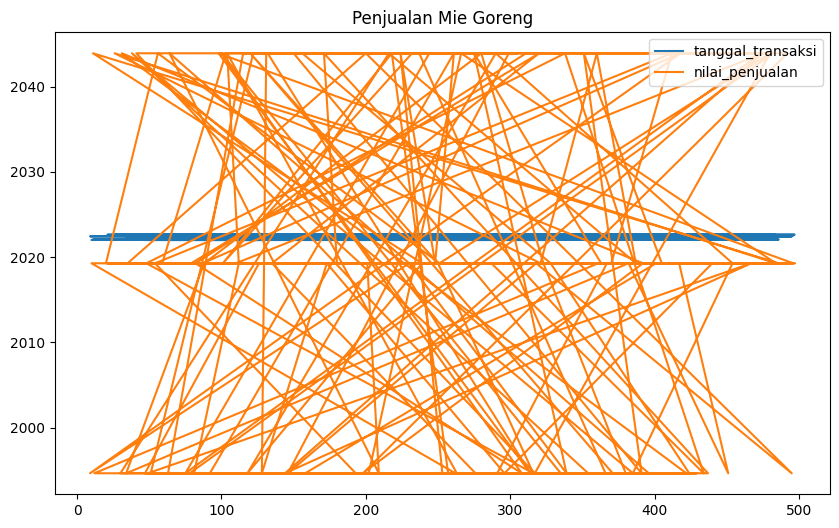

In [56]:
dataset_miegoreng.plot(figsize=(10, 6), title='Penjualan Mie Goreng')
plt.show()

In [57]:
train_size = int(len(dataset_miegoreng) * 0.8)
train, test = dataset_miegoreng[:train_size], dataset_miegoreng[train_size:]

In [58]:
order = (1, 0, 1)  # Example order (p, d, q)
model = ARIMA(train, order=order)
fit_model = model.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [52]:
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

NameError: name 'fit_model' is not defined

ValueError: x and y must have same first dimension, but have shapes (30,) and (37,)

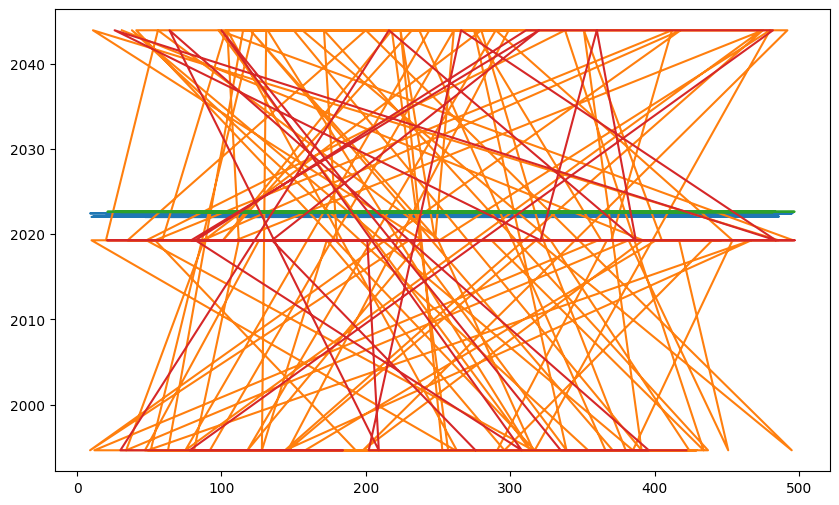

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, predictions, label='ARIMA Predictions', linestyle='--')
plt.title('ARIMA Model - Sales Forecasting')
plt.legend()
plt.show()

In [ ]:
dataset_miegoreng

,nilai_penjualan
tanggal_transaksi,
2022-01-02,18000
2022-01-05,9000
2022-01-05,9000
2022-01-05,9000
2022-01-08,18000
...,...
2022-08-22,18000
2022-08-23,18000
2022-08-23,27000


In [ ]:
dataset_miegoreng_clean = dataset_miegoreng.groupby('tanggal_transaksi')['nilai_penjualan'].sum().reset_index()
dataset_miegoreng_clean


,tanggal_transaksi,nilai_penjualan
0,2022-01-02,18000
1,2022-01-05,27000
2,2022-01-08,18000
3,2022-01-10,18000
4,2022-01-11,27000
...,...,...
106,2022-08-21,36000
107,2022-08-22,18000
108,2022-08-23,45000
109,2022-08-25,18000


In [ ]:
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-02', end='2022-08-29', freq='D')
sales_data = np.random.randint(100, 500, size=(len(date_rng)))

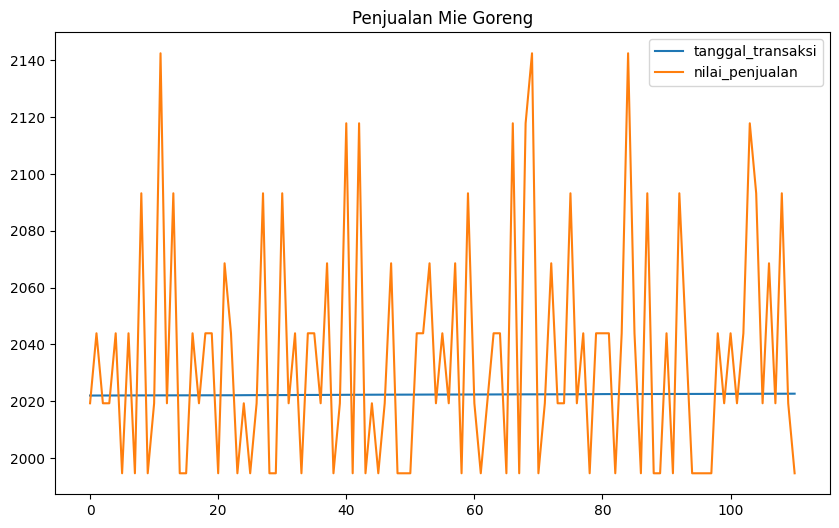

In [ ]:
dataset_miegoreng_clean.plot(figsize=(10, 6), title='Penjualan Mie Goreng')
plt.show()

In [ ]:
train_size = int(len(dataset_miegoreng_clean) * 0.8)
train, test = dataset_miegoreng_clean[:train_size], dataset_miegoreng_clean[train_size:]

In [ ]:
dataset_miegoreng_clean


,tanggal_transaksi,nilai_penjualan
0,2022-01-02,18000
1,2022-01-05,27000
2,2022-01-08,18000
3,2022-01-10,18000
4,2022-01-11,27000
...,...,...
106,2022-08-21,36000
107,2022-08-22,18000
108,2022-08-23,45000
109,2022-08-25,18000


In [84]:
dataset_miekuah_clean.set_index('tanggal_transaksi', inplace=True)

In [85]:
train_size = int(len(dataset_miekuah_clean) * 0.8)
train, test = dataset_miekuah_clean[:train_size], dataset_miekuah_clean[train_size:]

In [88]:
dataset_miekuah_clean

""
tanggal_transaksi
2022-01-01
2022-01-02
2022-01-03
2022-01-06
2022-01-07
...
2022-08-24
2022-08-26
2022-08-27


In [83]:
dataset_miekuah_clean

,tanggal_transaksi
nilai_penjualan,
18000,2022-01-01
20000,2022-01-02
55000,2022-01-03
9000,2022-01-06
65000,2022-01-07
...,...
30000,2022-08-24
40000,2022-08-26
38000,2022-08-27


In [82]:
model = ARIMA(dataset_miekuah_clean, order=(1,1,1))
model_fit = model.fit()

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<m8[ns]') and dtype('O')

In [ ]:
predictionss = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

NameError: name 'predictionss' is not defined

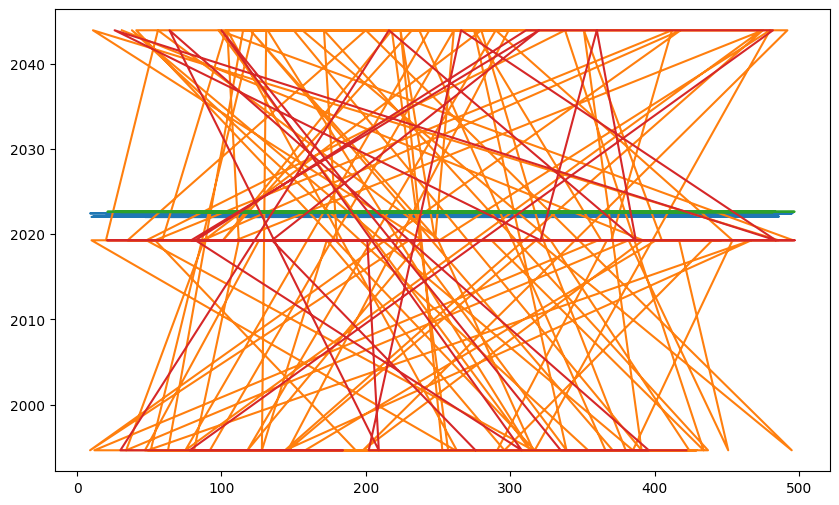

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, predictionss, label='ARIMA Predictions', linestyle='--')
plt.title('ARIMA Model - Sales Forecasting')
plt.legend()
plt.show()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rmse = sqrt(mean_squared_error(test, predictionss))
rmse


13995.97792364771

In [ ]:
X_train, y_train = np.arange(len(train)).reshape(-1, 1), train['nilai_penjualan'].values
X_test, y_test = np.arange(len(train), len(train) + len(test)).reshape(-1, 1), test['nilai_penjualan'].values

In [ ]:
model_2 = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions_2 = model_2.predict(X_test)


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions_2))
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

RMSE: 14633.260912153764
R^2 Score: -0.01903543894706483


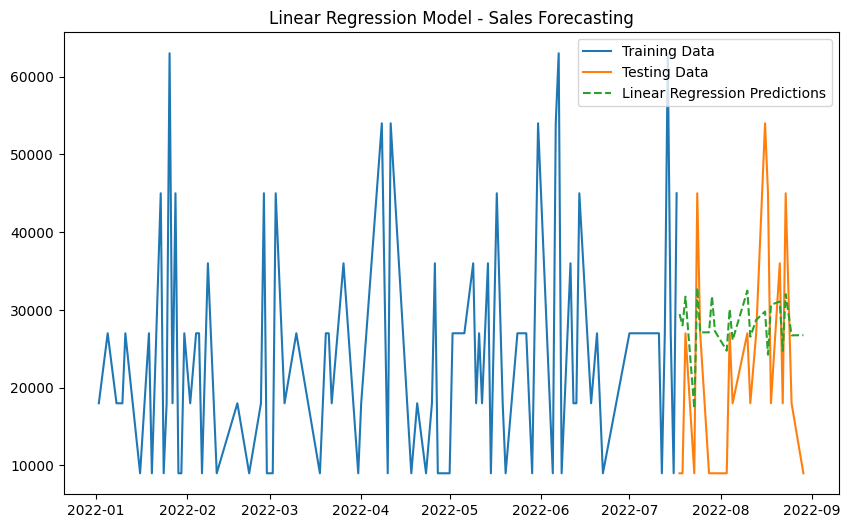

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, predictions, label='Linear Regression Predictions', linestyle='--')
plt.title('Linear Regression Model - Sales Forecasting')
plt.legend()
plt.show()

Random Forest RMSE: 18523.580741267626
Random Forest R^2 Score: -0.813017799352751


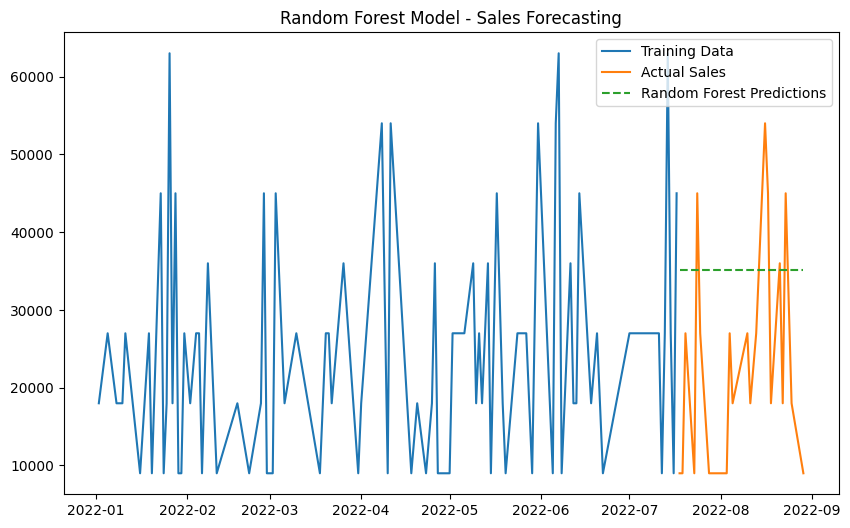

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Buat dan latih model Random Forest dengan hyperparameter yang dioptimalkan
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Lakukan prediksi pada set testing
rf_predictions = rf_model.predict(X_test)

# Evaluasi model Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R^2 Score: {rf_r2}')

# Visualisasi prediksi Random Forest
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Sales')
plt.plot(test.index, rf_predictions, label='Random Forest Predictions', linestyle='--')
plt.title('Random Forest Model - Sales Forecasting')
plt.legend()
plt.show()

In [ ]:
dataset_1

,tanggal_transaksi,jenis_produk,nilai_penjualan
429,2022-05-10,mie-goreng,9000
349,2022-05-27,mie-kuah,30000
158,2022-05-27,mie-goreng,9000
269,2022-05-26,mie-kuah,9000
465,2022-05-21,mie-kuah,10000
...,...,...,...
153,2022-05-24,mie-kuah,9000
417,2022-05-24,mie-goreng,18000
451,2022-05-24,mie-goreng,9000
278,2022-02-23,mie-kuah,20000


In [ ]:
regresi_jenis_produk = dataset_1.iloc[:,1]
regresi_jenis_produk.to_frame()



,jenis_produk
429,mie-goreng
349,mie-kuah
158,mie-goreng
269,mie-kuah
465,mie-kuah
...,...
153,mie-kuah
417,mie-goreng
451,mie-goreng
278,mie-kuah


KeyError: "['mie-goreng'] not in index"

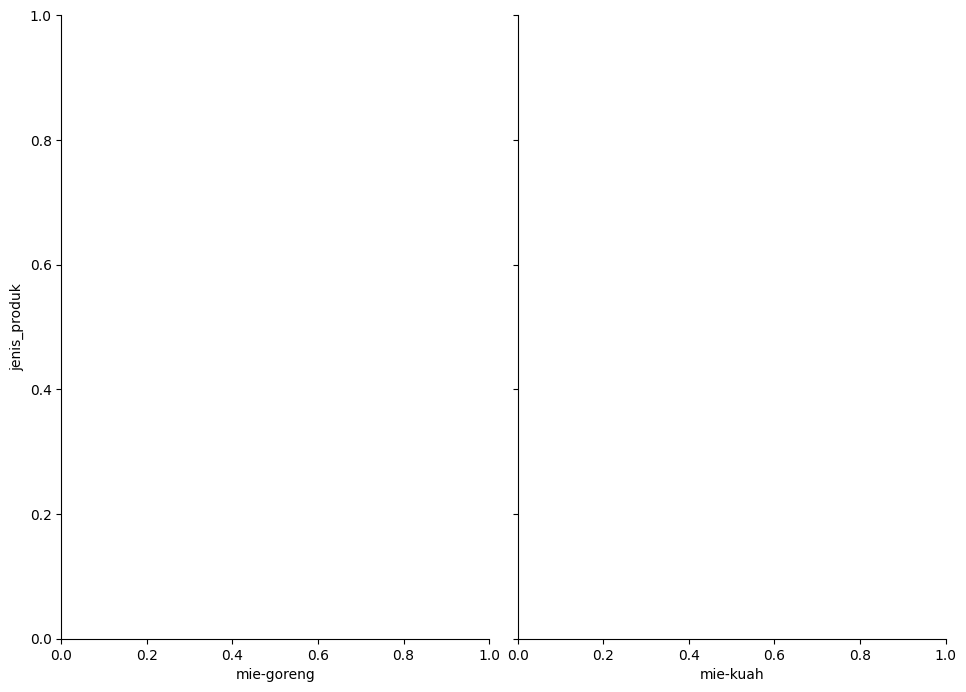

In [ ]:
sns.pairplot(regresi_jenis_produk.to_frame(), x_vars=['mie-goreng','mie-kuah'], y_vars='jenis_produk', height=7, aspect=0.7)

In [34]:
dataset_miekuah

,tanggal_transaksi,nilai_penjualan
445,2022-01-01,18000
205,2022-01-02,20000
238,2022-01-03,27000
8,2022-01-03,18000
346,2022-01-03,10000
...,...,...
177,2022-08-27,18000
441,2022-08-27,20000
461,2022-08-29,20000
394,2022-08-29,20000


In [36]:
dataset_miekuah_clean = dataset_miekuah.groupby('tanggal_transaksi')['nilai_penjualan'].sum().reset_index()
dataset_miekuah_clean


,tanggal_transaksi,nilai_penjualan
0,2022-01-01,18000
1,2022-01-02,20000
2,2022-01-03,55000
3,2022-01-06,9000
4,2022-01-07,65000
...,...,...
180,2022-08-24,30000
181,2022-08-26,40000
182,2022-08-27,38000
183,2022-08-29,40000


In [37]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
train_size = int(len(dataset_miekuah_clean) * 0.8)
train, test = dataset_miekuah_clean[:train_size], dataset_miekuah_clean[train_size:]

In [48]:

# Load data
# Misalkan df adalah DataFrame dengan kolom 'tanggal' dan 'nilai_penjualan'
# Pastikan 'tanggal' adalah tipe data datetime
# df = ...

# Pisahkan data menjadi set pelatihan dan pengujian
train_size_miekuah = int(len(dataset_miekuah_clean) * 0.8)
train, test = dataset_miekuah_clean[:train_size_miekuah], dataset_miekuah_clean[train_size_miekuah:]

# Latih model ARIMA
model = ARIMA(train['nilai_penjualan'], order=(1, 0, 0))  # Ganti p, d, q dengan nilai yang sesuai
model_fit = model.fit()

# Buat prediksi
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluasi model dengan RMSE
rmse = sqrt(mean_squared_error(test['nilai_penjualan'], predictions))
print('RMSE:', rmse)


RMSE: 17509.216565718543


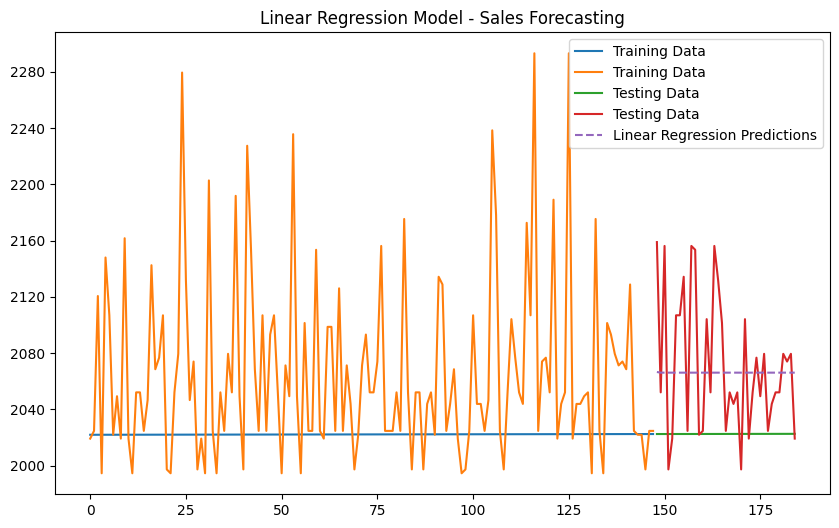

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, predictions, label='Linear Regression Predictions', linestyle='--')
plt.title('Linear Regression Model - Sales Forecasting')
plt.legend()
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression

In [66]:
X = np.arange(len(df)).reshape(-1, 1)
y = df['nilai_penjualan'].values.reshape(-1, 1)

In [67]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [68]:
predictions = model.predict(X)

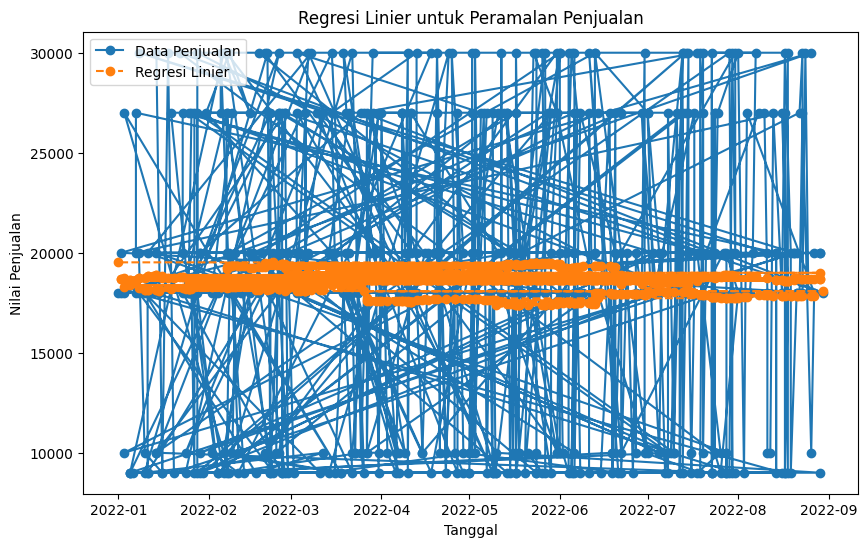

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(df['tanggal_transaksi'], df['nilai_penjualan'], label='Data Penjualan', marker='o')
plt.plot(df['tanggal_transaksi'], predictions, label='Regresi Linier', linestyle='--', marker='o')
plt.title('Regresi Linier untuk Peramalan Penjualan')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Penjualan')

plt.legend()
plt.show()


In [19]:
dataset_jenisproduk = dataset_1['jenis_produk']

In [20]:
data_pie = dataset_jenisproduk.values()
label_pie = dataset_jenisproduk.keys()
colors = sns.color_palette('pastel')[:]

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
plt.pie(x = data_pie, labels = label_pie, colors = colors, autopct = '%.0f%%'
plt.title("Data Jenis Produk)
plt.show()